## Introducción

La tienda online **Ice**, dedicada a la venta global de videojuegos, busca aprovechar datos de reseñas de usuarios y expertos, géneros, plataformas y registros históricos de ventas para optimizar sus decisiones comerciales. El objetivo del proyecto es **identificar patrones que permitan predecir el éxito de un videojuego**, con el fin de reconocer proyectos prometedores y planificar campañas publicitarias más efectivas.


Paso 1: Cargamos las librerias y abrimos el archivo de datos

In [ ]:
# Cargamos las librerias que vamos a utilizar.

import pandas as pd
import numpy as np
import math as mt
import seaborn as sns
from scipy import stats as st
from matplotlib import pyplot as plt



# Cargamos el archivo y creamos el DataFrame 'games' con los datos de este.
games = pd.read_csv('/datasets/games.csv')

Paso 2: Preparamos los datos

In [ ]:
# Mostramos la información general/resumida sobre el DataFrame de los videojuegos para analizarla.

print(games.info())
print(games.sample(10))


# Convertimos los nombres de las columna en minúsculas de acuerdo con las reglas del buen estilo.

new_col_name = []

for old_name in games.columns:
    low_name = old_name.lower()
    new_col_name.append(low_name)

games.columns = new_col_name


# Como los valores de las columnas 'name', 'genre' y son necesarios para el análisis
# y además como son valores categóricos, no les podemos asignar valores representativos. Por
# las anteriores razones, eh decidido retirar las filas que tengan valores ausentes en estas
# columnas, del DataFrame. Probablemente hay valores ausentes en estas columnas porque hubo
# un error al momento de crearce el archivo games.

games.dropna(subset=['name'], inplace=True)
games.dropna(subset=['genre'], inplace=True)


# Para definir con que valores sustituir los valores ausentes en la columna 'year_of_release',
# veremos si hay valores atípicos. Probablemente hay valores ausentes en esta columna porque
# se desconocía el año de lanzamiento.

avg_games_yor = games['year_of_release'].mean()
median_games_yor = games['year_of_release'].median()

print()
print(f"La media del año de lanzamiento es: {avg_games_yor:.2f}")
print(f"La mediana del año de lanzamiento es: {median_games_yor:.2f}")


# Como no hay gran diferenia entre la media y la mediana de los valores de la columna
# 'year_of_release' podemos concluir que no hay valores atípicos en esta, por lo que
# rellenaré los valores ausentes de la columna anterior, con la media de la misma.

games['year_of_release'].fillna(avg_games_yor, inplace=True)


# Como no hace sentido tener fracciones de años, vamos a convertir los valores de la columna
# 'year_of_release' a enteros.

games['year_of_release'] = games['year_of_release'].astype('int')


# Para definir con que valores sustituir los valores ausentes en la columna 'critic_score',
# veremos si hay valores atípicos. Probablemente hay valores ausentes en esta columna porque
# no todos los videojuegos fueron evaluados por los críticos.

avg_games_critic_score = games['critic_score'].mean()
median_games_critic_score = games['critic_score'].median()

print()
print(f"La media de la calificación de los críticos es: {avg_games_critic_score:.2f}")
print(f"La mediana de la calificación de los críticos es: {median_games_critic_score:.2f}")


# Como no hay gran diferenia entre la media y la mediana de los valores de la columna
# 'critic_socre' podemos concluir que no hay valores atípicos en esta, por lo que
# rellenaré los valores ausentes de la columna anterior, con la media de la misma.

games['critic_score'].fillna(avg_games_critic_score, inplace=True)


# Para reemplazar los valores ausentes en la columna 'user_score' primero necesitamos convertilos
# a números enteros y para eso primero necesitamos reemplazar 'tbd' por '0'. Probablemente hay
# valores ausentes en esta columna porque no todos los videojuegos fueron evaluados por los
# usuarios.

games['user_score'] = games['user_score'].replace('tbd', '0')
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')


# Para definir con que valores sustituir los valores ausentes en la columna 'user_score',
# veremos si hay valores atípicos.

avg_games_user_score = games['user_score'].mean()
median_games_user_score = games['user_score'].median()

print()
print(f"La media de la calificación de los usuarios es: {avg_games_user_score:.2f}")
print(f"La mediana de la calificación de los ususarios es: {median_games_user_score:.2f}")


# Como no hay gran diferenia entre la media y la mediana de los valores de la columna
# 'user_socre' podemos concluir que no hay valores atípicos en esta, por lo que
# rellenaré los valores ausentes de la columna anterior, con la media de la misma.

games['user_score'].fillna(avg_games_user_score, inplace=True)


# Como las calificaciones en la columna 'rating' son categóricas, no podremos reemplazar los
# valores ausentes por valores representativos, por lo tanto los valores ausentes de esta columna
# se reemplazaran por 'none'. Probablemente hay valores ausentes en esta columna porque no todos
# los videojuegos fueron evaluados por la ESRB.

games['rating'].fillna('none', inplace=True)


# Calculamos las ventas totales de los videojuegos y las colocamos en la columna 'total_sales'.

games['total_sales'] = (games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales'])

print(games.info())
print(games.sample(15))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
                                                    Name Platform  \
6768                                  Hitman: Absolution       PC   
14109                      Kuroshitsuji: Phantom & Ghost       DS   
1407                         

Comentario del paso 2:
Primero vimos la infromación general y una muestra del DataFrame para decidir que cambios eran necesarios hacer para preparar los datos.
Durante el paso 2 cambiamos el nombre de las columnas para que estas cumplan con el formato del buen estilo, después eliminamos las filas con valores ausentes en las columnas nombre y género, seguido rellenamos los valores ausentes en el resto de las columnas con valores representativos de las mismas y finalmente calculamos las ventas totales de cada videojuego.

Paso 3: Analizamos los datos

Lanzamientos de videojuegos por año

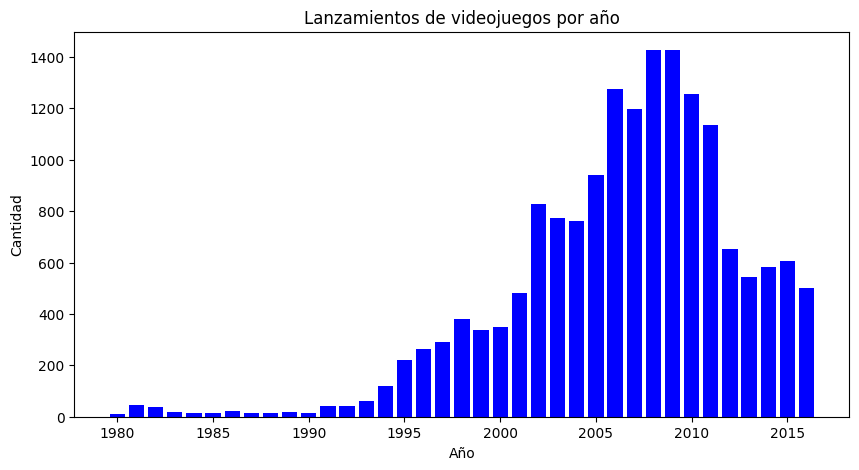

In [ ]:
# Agupamos el DataFrame 'games' por año de lanzamiento y creamos una columna con la cantidad de
# juegos lanzados en cada año.

games_release_year = (games
                     .groupby('year_of_release', as_index = False)
                     .agg(no_release_year = ('year_of_release', 'count'))
                     )


# Presentamos la cantidad de juegos lanzados por año en un gráfico de barras.

plt.figure(figsize=(10,5))
plt.bar(games_release_year['year_of_release'], games_release_year['no_release_year'], color='blue')
plt.title('Lanzamientos de videojuegos por año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.show()

Comentarios de los lanzamientos de videojuegos por año:
El boom de creación de nuevo juegos fue alrededor del 2008, siendo los años 2008 y 2009 en los que más nuevos juegos se lanzaron.

Ventas totales por plataforma y año

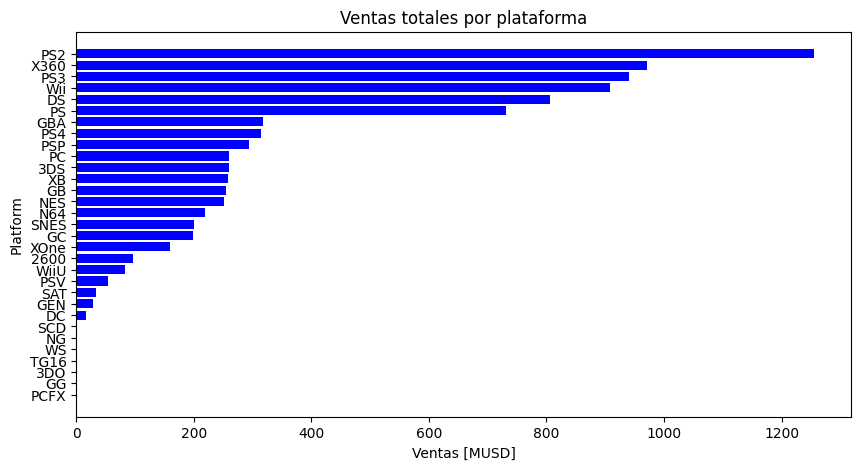

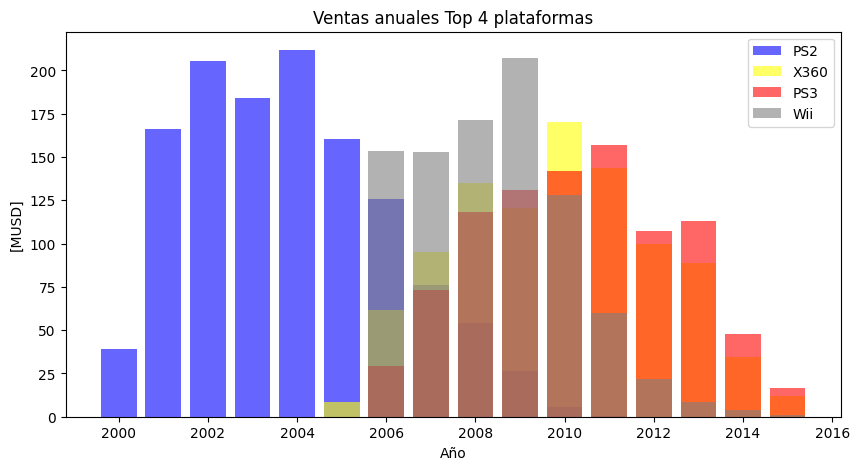

In [ ]:
# Agrupamos el DataFrame 'games' por plataforma y creamos una columna con las ventas totales
# por plataforma.

platform_total_sales = (games
                       .groupby('platform', as_index=False)
                       .agg(total_sales_platform = ('total_sales', 'sum'))
                       )


# Ordenamos el DataFrame anterior de porfa ascendente.

platform_total_sales = platform_total_sales.sort_values(by='total_sales_platform', ascending=True)


# Presentamos las ventas totales de cada plataforma en un gráfico de barras.

plt.figure(figsize=(10,5))
plt.barh(platform_total_sales['platform'], platform_total_sales['total_sales_platform'], color='blue')
plt.title('Ventas totales por plataforma')
plt.xlabel('Ventas [MUSD]')
plt.ylabel('Platform')
plt.show()


# Agrupamos el DataFrame 'games' por plataforma y año de lanzamiento y creamos una columna con
# las ventas totales en cada año.

platform_total_sales_year = (games
                            .groupby(['platform', 'year_of_release'], as_index = False)
                            .agg(total_sales_year = ('total_sales', 'sum'))
                            )


# Filtramos el DataFrame anterior por el top 4 de plataformas que vimos en el gráfico de barras
# y por el periodo donde vemos mayores ventas en dichas plataformas (2000 - 2015).

top_platforms = ['PS2','X360','PS3','Wii']
top_platforms_sales_period = platform_total_sales_year[platform_total_sales_year['platform'].isin(top_platforms)]
top_platforms_sales_period = top_platforms_sales_period.reset_index(drop=True)

best_years = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]
top_platforms_sales_period = top_platforms_sales_period[top_platforms_sales_period['year_of_release'].isin(best_years)]
top_platforms_sales_period = top_platforms_sales_period.reset_index(drop=True)


# Presentamos el comportamiento de las ventas del top 4 de las plataformas, a lo largo del
# periodo de tiempo seleccionado.

sells_ps2 = top_platforms_sales_period[top_platforms_sales_period['platform']=='PS2']['total_sales_year']
years_ps2 = top_platforms_sales_period[top_platforms_sales_period['platform']=='PS2']['year_of_release']
sells_x360 = top_platforms_sales_period[top_platforms_sales_period['platform']=='X360']['total_sales_year']
years_x360 = top_platforms_sales_period[top_platforms_sales_period['platform']=='X360']['year_of_release']
sells_ps3 = top_platforms_sales_period[top_platforms_sales_period['platform']=='PS3']['total_sales_year']
years_ps3 = top_platforms_sales_period[top_platforms_sales_period['platform']=='PS3']['year_of_release']
sells_wii = top_platforms_sales_period[top_platforms_sales_period['platform']=='Wii']['total_sales_year']
years_wii = top_platforms_sales_period[top_platforms_sales_period['platform']=='Wii']['year_of_release']

plt.figure(figsize=(10,5))
plt.bar(years_ps2, sells_ps2, color='blue', label='PS2', alpha=0.6)
plt.bar(years_x360, sells_x360, color='yellow', label='X360', alpha=0.6)
plt.bar(years_ps3, sells_ps3, color='red', label='PS3', alpha=0.6)
plt.bar(years_wii, sells_wii, color='gray', label='Wii', alpha=0.6)
plt.title('Ventas anuales Top 4 plataformas')
plt.xlabel('Año')
plt.ylabel('[MUSD]')
plt.legend(loc = 'upper right')
plt.show()

Comentarios de las ventas totales por plataforma y año:
Primero quisimos conocer las ventas totales por plataforma y descubrimos que el top 4 son:
PS2, X360, PS3 y Wii.
Podemos ver del segundo gráfico que PS2 obtuvo ventas del 2000 al 2009, siendo el pico mas alto en el 2004.
X360 obtuvo ventas del 2005 al 2015, siendo el pico más alto en el 2010.
PS3 obtuvo ventas del 2006 al 2015, siendo su pico más alto en el 2011
Y Wii obtuvo ventas del 2005 al 2014, siendo su pico más alto en el 2009.
Tambien podemos elegir los años con los cuales deberiamos de trabajar, aunque consideramos datos desde 1995, a partir del 2000 hubieron ventas de las principales platafromas y aparentemente hasta el 2015 siguieron teniendo gran exito. Por lo que los años que utilizaremos para los siguientes análisis son del 2000 al 2015.


Media ventas totales PS2: 0.58
Media ventas totales X360: 0.78
Media ventas totales PS3: 0.72
Media ventas totales Wii: 0.69


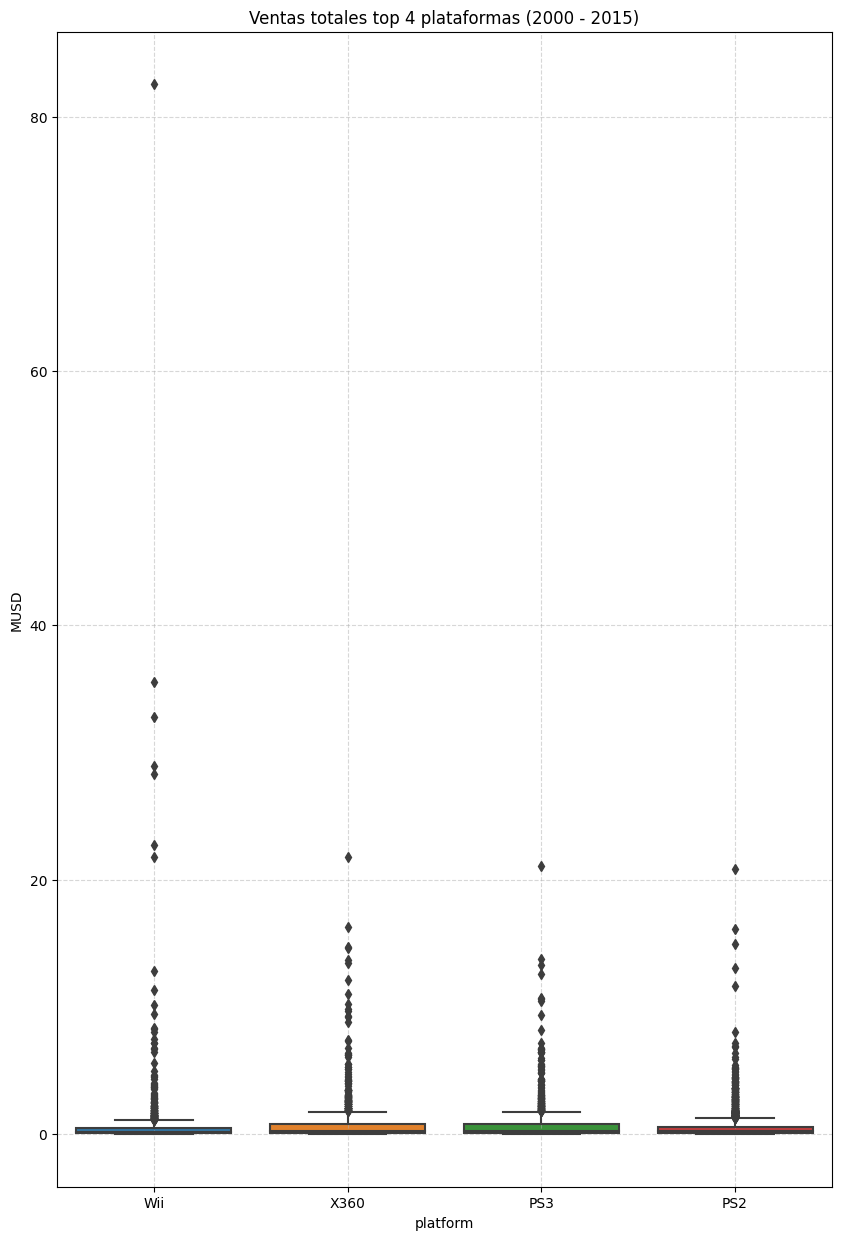

In [ ]:
#Graficamos las ventas totales de todos los videojuegos, desglosados por el top 4 de las
# plataformas. Y mostramos las medias de las mismas.

platform_individual_sales = games[games['year_of_release'].isin(best_years)]
platform_individual_sales = platform_individual_sales[platform_individual_sales['platform'].isin(top_platforms)]
platform_individual_sales = platform_individual_sales.reset_index(drop=True)

ps2_avg_sales = platform_individual_sales[platform_individual_sales['platform']=='PS2']['total_sales'].mean()
print(f"Media ventas totales PS2: {ps2_avg_sales:.2f}")
x360_avg_sales = platform_individual_sales[platform_individual_sales['platform']=='X360']['total_sales'].mean()
print(f"Media ventas totales X360: {x360_avg_sales:.2f}")
ps3_avg_sales = platform_individual_sales[platform_individual_sales['platform']=='PS3']['total_sales'].mean()
print(f"Media ventas totales PS3: {ps3_avg_sales:.2f}")
wii_avg_sales = platform_individual_sales[platform_individual_sales['platform']=='Wii']['total_sales'].mean()
print(f"Media ventas totales Wii: {wii_avg_sales:.2f}")


plt.figure(figsize=(10, 15))
sns.boxplot(x='platform', y='total_sales', data=platform_individual_sales)
plt.title("Ventas totales top 4 plataformas (2000 - 2015)")
plt.ylabel("MUSD")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


Comentarios de los gráficos de caja y las medias del top 4 plataformas:
La plataforma con mayores ventas en promedio es X360, mientras que PS2 es la plataforma con la menor media de ventas totales.
Las distribuciones de las ventas totales de cada plataforma son similares y totdas tienen "Outliers" que pienso son debido a los juegos que representaron un pico de ventas muy por encima de la mediana y la media. La plataforma Wii es la que tiene "Outliers" más grandes que el resto.

Relación de ventas totales con calificaciones (X360)

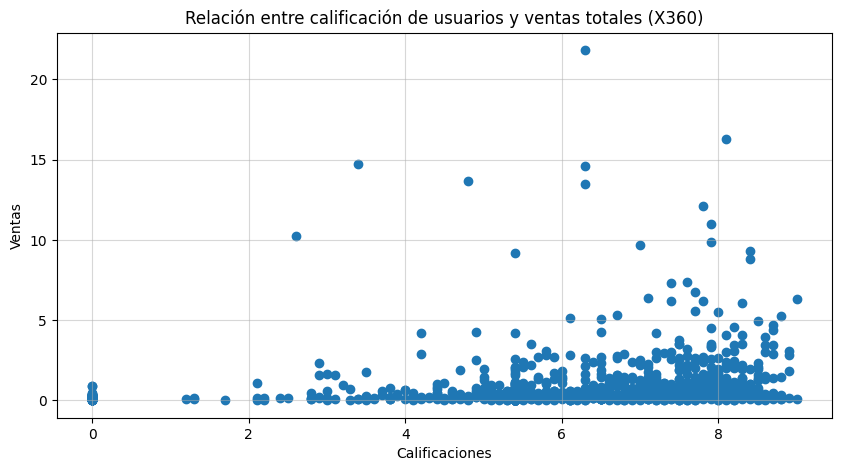

             user_score  total_sales
user_score     1.000000     0.175762
total_sales    0.175762     1.000000


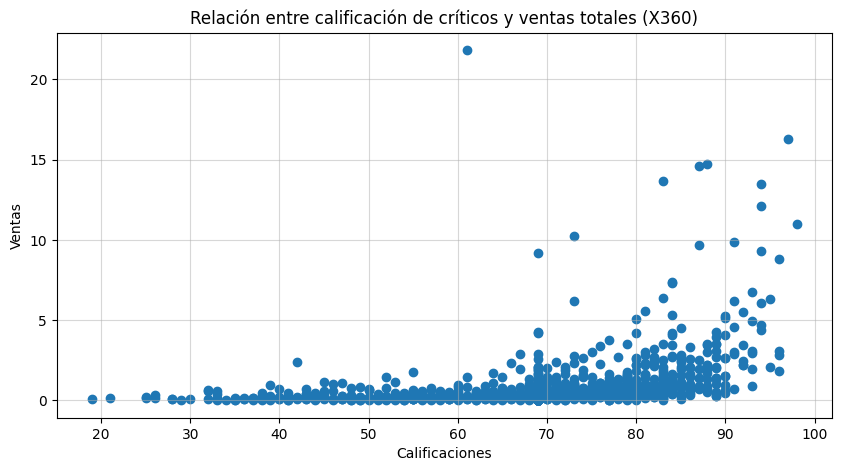

              critic_score  total_sales
critic_score      1.000000     0.375313
total_sales       0.375313     1.000000


In [ ]:
# Presentamos gráficos de dispersión para las ventas totales vs calificaciones de usuarios y
# ventas totales vs calificaciones de los críticos. Y mostramos matrices de correlación.

x360_individual_sales = platform_individual_sales[platform_individual_sales['platform']=='X360']

plt.figure(figsize=(10, 5))
plt.scatter(x360_individual_sales["user_score"], x360_individual_sales["total_sales"])
plt.title("Relación entre calificación de usuarios y ventas totales (X360)")
plt.xlabel("Calificaciones")
plt.ylabel("Ventas")
plt.grid(alpha=0.5)
plt.show()

x360_user_vs_sales = x360_individual_sales.drop(columns = ['name','platform','year_of_release','genre','na_sales','eu_sales','jp_sales','other_sales','critic_score','rating'])
corr_matrix = x360_user_vs_sales.corr()
print(corr_matrix)


plt.figure(figsize=(10, 5))
plt.scatter(x360_individual_sales["critic_score"], x360_individual_sales["total_sales"])
plt.title("Relación entre calificación de críticos y ventas totales (X360)")
plt.xlabel("Calificaciones")
plt.ylabel("Ventas")
plt.grid(alpha=0.5)
plt.show()

x360_critic_vs_sales = x360_individual_sales.drop(columns = ['name','platform','year_of_release','genre','na_sales','eu_sales','jp_sales','other_sales','user_score','rating'])
corr_matrix_2 = x360_critic_vs_sales.corr()
print(corr_matrix_2)

Comentarios de correlaciones:
Podemos apreciar que la correlación entre las ventas totales y las calificaciones de los críticos es mucho mayor que la de las ventas totales y las calificaciones de los usuarios. Por lo que la opinión de los críticos tiene un mayor peso en la decisión de compra de los usuarios.

Comparación del top 5 videojuegos X360 vs top 4 plataformas

In [ ]:
# Averiguamos el top 5 de videjuegos vendidos en la plataforma X360.

top_x360_games = (x360_individual_sales
                  .groupby('name', as_index=False)['total_sales'].sum()
                 )

top_x360_games = top_x360_games.sort_values(by='total_sales', ascending=False)
top_x360_games = top_x360_games.reset_index(drop=True)

top_x360_games_list = ['Kinect Adventures!','Grand Theft Auto V','Call of Duty: Modern Warfare 3','Call of Duty: Black Ops','Call of Duty: Black Ops II']

print("Top 5 videojuegos x360")
print(top_x360_games.head())


# Mostramos las ventas del top 5 de videojuegos de X360, pero en PS2

ps2_individual_sales = platform_individual_sales[platform_individual_sales['platform']=='PS2']

list_ps2_games = (ps2_individual_sales
                  .groupby('name', as_index=False)['total_sales'].sum()
                 )

list_ps2_games = list_ps2_games[list_ps2_games['name'].isin(top_x360_games_list)]
list_ps2_games = list_ps2_games.sort_values(by='total_sales', ascending=False)
list_ps2_games = list_ps2_games.reset_index(drop=True)

print()
print("Esos mismos juegos no existen en PS2")
print(list_ps2_games)


# Mostramos las ventas del top 5 de videojuegos de X360, pero en PS3

ps3_individual_sales = platform_individual_sales[platform_individual_sales['platform']=='PS3']

list_ps3_games = (ps3_individual_sales
                  .groupby('name', as_index=False)['total_sales'].sum()
                 )

list_ps3_games = list_ps3_games[list_ps3_games['name'].isin(top_x360_games_list)]
list_ps3_games = list_ps3_games.sort_values(by='total_sales', ascending=False)
list_ps3_games = list_ps3_games.reset_index(drop=True)

print()
print("Top 5 videjuegos x360 en PS3")
print(list_ps3_games)


# Mostramos las ventas del top 5 de videojuegos de X360, pero en Wii

wii_individual_sales = platform_individual_sales[platform_individual_sales['platform']=='Wii']

list_wii_games = (wii_individual_sales
                  .groupby('name', as_index=False)['total_sales'].sum()
                 )

list_wii_games = list_wii_games[list_wii_games['name'].isin(top_x360_games_list)]
list_wii_games = list_wii_games.sort_values(by='total_sales', ascending=False)
list_wii_games = list_wii_games.reset_index(drop=True)

print()
print("Top 5 videjuegos x360 en Wii")
print(list_wii_games)

Top 5 videojuegos x360
                             name  total_sales
0              Kinect Adventures!        21.82
1              Grand Theft Auto V        16.27
2  Call of Duty: Modern Warfare 3        14.73
3         Call of Duty: Black Ops        14.62
4      Call of Duty: Black Ops II        13.68

Esos mismos juegos no existen en PS2
Empty DataFrame
Columns: [name, total_sales]
Index: []

Top 5 videjuegos x360 en PS3
                             name  total_sales
0              Grand Theft Auto V        21.05
1      Call of Duty: Black Ops II        13.79
2  Call of Duty: Modern Warfare 3        13.33
3         Call of Duty: Black Ops        12.63

Top 5 videjuegos x360 en Wii
                             name  total_sales
0         Call of Duty: Black Ops         1.37
1  Call of Duty: Modern Warfare 3         0.83


Comentarios de comparativa del top 5 videojuegos X360 vs top 4 plataformas:
-Los juego más vendidos en X360 no estan disponibles para PS2.
-El juego "Kinect Adventures !" no esta disponible en PS3 y en PS3 el juego más vendido del listado fue "Grand Theft Auto V".
-La plataforma Wii solo comparte 2 uegos del listado y sus ventas no se comparan con las de X360.

Ventas por género

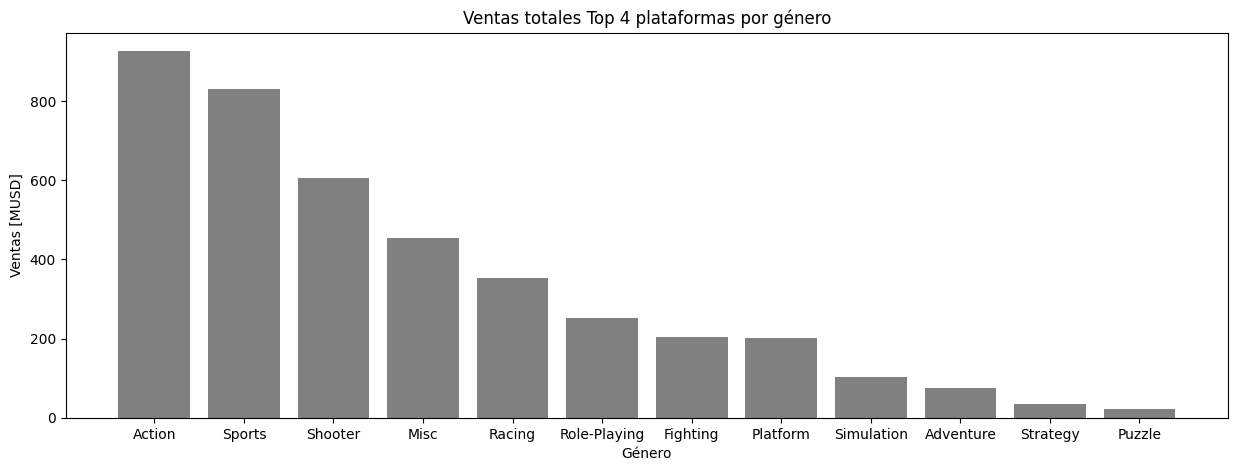

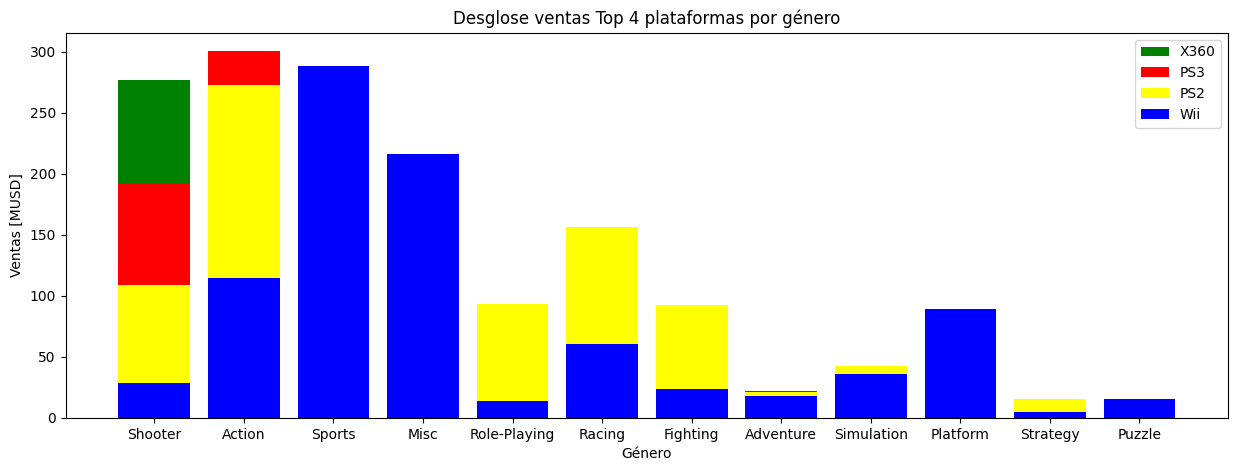

In [ ]:
# Mostramos las ventas por género del Top 4 plataformas

genre_sells = (platform_individual_sales
               .groupby('genre', as_index=False)['total_sales'].sum()
              )
genre_sells = genre_sells.sort_values(by='total_sales', ascending=False)
genre_sells = genre_sells.reset_index(drop=True)

plt.figure(figsize=(15, 5))
plt.bar(genre_sells["genre"], genre_sells["total_sales"], color='gray')
plt.title("Ventas totales Top 4 plataformas por género")
plt.xlabel("Género")
plt.ylabel("Ventas [MUSD]")
plt.show()


# Ventas por género en X360

x360_genre_sells = (x360_individual_sales
               .groupby('genre', as_index=False)['total_sales'].sum()
              )
x360_genre_sells = x360_genre_sells.sort_values(by='total_sales', ascending=False)
x360_genre_sells = x360_genre_sells.reset_index(drop=True)


# Ventas por género en PS3

ps3_genre_sells = (ps3_individual_sales
               .groupby('genre', as_index=False)['total_sales'].sum()
              )
ps3_genre_sells = ps3_genre_sells.sort_values(by='total_sales', ascending=False)
ps3_genre_sells = ps3_genre_sells.reset_index(drop=True)


# Ventas por género en PS2

ps2_genre_sells = (ps2_individual_sales
               .groupby('genre', as_index=False)['total_sales'].sum()
              )
ps2_genre_sells = ps2_genre_sells.sort_values(by='total_sales', ascending=False)
ps2_genre_sells = ps2_genre_sells.reset_index(drop=True)


# Ventas por género en Wii

wii_genre_sells = (wii_individual_sales
               .groupby('genre', as_index=False)['total_sales'].sum()
              )
wii_genre_sells = wii_genre_sells.sort_values(by='total_sales', ascending=False)
wii_genre_sells = wii_genre_sells.reset_index(drop=True)

plt.figure(figsize=(15, 5))
plt.bar(x360_genre_sells["genre"], x360_genre_sells["total_sales"], color='green', label='X360')
plt.bar(ps3_genre_sells["genre"], ps3_genre_sells["total_sales"], color='red', label='PS3')
plt.bar(ps2_genre_sells["genre"], ps2_genre_sells["total_sales"], color='yellow', label='PS2')
plt.bar(wii_genre_sells["genre"], wii_genre_sells["total_sales"], color='blue', label='Wii')
plt.title("Desglose ventas Top 4 plataformas por género")
plt.xlabel("Género")
plt.ylabel("Ventas [MUSD]")
plt.legend()
plt.show()


Comentarios de ventas por género:
Si solo vemos las ventas por género del Top 4 de plataformas, el que más acumula ventas es "Action" sin embargo, al ver el desglose podemos confirmar que el género "Shooter" es el único que se juega en todas ellas. Cada plataforma tiene un género favorito; siendo Shooter en X360 y PS3, "Action" en PS2 y "Sports" en Wii.

Paso 4: Creamos un perfil de usuario para cada región.

In [ ]:
# Datos para América del Norte
# Filtramos el DataFrame 'games' para quedarnos con los datos de América del Norte.

na_individual_sales = games[games['na_sales']!=0]
na_individual_sales = na_individual_sales.drop(columns=['eu_sales','jp_sales','other_sales','total_sales'])


# Agrupamos por plataformas y buscamos el top 5.

top_5_platform_na = (na_individual_sales
                     .groupby('platform', as_index=False)['na_sales'].sum()
                    )
top_5_platform_na = top_5_platform_na.sort_values(by='na_sales', ascending=False)
top_5_platform_na = top_5_platform_na.reset_index(drop=True)
top_5_platform_na.rename({'platform':'na_platform'}, axis=1, inplace=True)
na_plat = top_5_platform_na[:5]


# Agrupamos por género y buscamos el top 5.

top_5_genre_na = (na_individual_sales
                  .groupby('genre', as_index=False)['na_sales'].sum()
                 )
top_5_genre_na = top_5_genre_na.sort_values(by='na_sales', ascending=False)
top_5_genre_na = top_5_genre_na.reset_index(drop=True)
top_5_genre_na.rename({'genre':'na_genre'}, axis=1, inplace=True)
na_genre = top_5_genre_na[:5]


# Agrupamos por calificación ESRB y buscamos el top 5.

rating_na_sales = (na_individual_sales
                  .groupby('rating', as_index=False)['na_sales'].sum()
                  )
rating_na_sales = rating_na_sales.sort_values(by='na_sales', ascending=False)
rating_na_sales = rating_na_sales.reset_index(drop=True)
rating_na_sales.rename({'rating':'na_rating'}, axis=1, inplace=True)
na_rate = rating_na_sales[:5]


# Datos para Europa
# Filtramos el DataFrame 'games' para quedarnos con los datos de Europa.

eu_individual_sales = games[games['eu_sales']!=0]
eu_individual_sales = eu_individual_sales.drop(columns=['na_sales','jp_sales','other_sales','total_sales'])


# Agrupamos por plataformas y buscamos el top 5.

top_5_platform_eu = (eu_individual_sales
                     .groupby('platform', as_index=False)['eu_sales'].sum()
                    )
top_5_platform_eu = top_5_platform_eu.sort_values(by='eu_sales', ascending=False)
top_5_platform_eu = top_5_platform_eu.reset_index(drop=True)
top_5_platform_eu.rename({'platform':'eu_platform'}, axis=1, inplace=True)
eu_plat = top_5_platform_eu[:5]


# Agrupamos por género y buscamos el top 5.

top_5_genre_eu = (eu_individual_sales
                  .groupby('genre', as_index=False)['eu_sales'].sum()
                 )
top_5_genre_eu = top_5_genre_eu.sort_values(by='eu_sales', ascending=False)
top_5_genre_eu = top_5_genre_eu.reset_index(drop=True)
top_5_genre_eu.rename({'genre':'eu_genre'}, axis=1, inplace=True)
eu_genre = top_5_genre_eu[:5]


# Agrupamos por calificación ESRB y buscamos el top 5.

rating_eu_sales = (eu_individual_sales
                  .groupby('rating', as_index=False)['eu_sales'].sum()
                  )
rating_eu_sales = rating_eu_sales.sort_values(by='eu_sales', ascending=False)
rating_eu_sales = rating_eu_sales.reset_index(drop=True)
rating_eu_sales.rename({'rating':'eu_rating'}, axis=1, inplace=True)
eu_rate = rating_eu_sales[:5]


# Datos para Japón
# Filtramos el DataFrame 'games' para quedarnos con los datos de Japón.

jp_individual_sales = games[games['jp_sales']!=0]
jp_individual_sales = jp_individual_sales.drop(columns=['na_sales','eu_sales','other_sales','total_sales'])


# Agrupamos por plataformas y buscamos el top 5.

top_5_platform_jp = (jp_individual_sales
                     .groupby('platform', as_index=False)['jp_sales'].sum()
                    )
top_5_platform_jp = top_5_platform_jp.sort_values(by='jp_sales', ascending=False)
top_5_platform_jp = top_5_platform_jp.reset_index(drop=True)
top_5_platform_jp.rename({'platform':'jp_platform'}, axis=1, inplace=True)
jp_plat = top_5_platform_jp[:5]


# Agrupamos por género y buscamos el top 5.

top_5_genre_jp = (jp_individual_sales
                  .groupby('genre', as_index=False)['jp_sales'].sum()
                 )
top_5_genre_jp = top_5_genre_jp.sort_values(by='jp_sales', ascending=False)
top_5_genre_jp = top_5_genre_jp.reset_index(drop=True)
top_5_genre_jp.rename({'genre':'jp_genre'}, axis=1, inplace=True)
jp_genre = top_5_genre_jp[:5]


# Agrupamos por calificación ESRB y buscamos el top 5.

rating_jp_sales = (jp_individual_sales
                  .groupby('rating', as_index=False)['jp_sales'].sum()
                  )
rating_jp_sales = rating_jp_sales.sort_values(by='jp_sales', ascending=False)
rating_jp_sales = rating_jp_sales.reset_index(drop=True)
rating_jp_sales.rename({'rating':'jp_rating'}, axis=1, inplace=True)
jp_rate = rating_jp_sales[:5]


# Concatenamos el top 5 de cada enfoque para todas las regiones.

platforms = pd.concat([na_plat, eu_plat, jp_plat], axis='columns')
print("Top 5 plataformas por región")
print(platforms)
print()
genres = pd.concat([na_genre, eu_genre, jp_genre], axis='columns')
print("Top 5 géneros por región")
print(genres)
print()
ratings = pd.concat([na_rate, eu_rate, jp_rate], axis='columns')
print("Top 5 ESRB por región")
print(ratings)




Top 5 plataformas por región
  na_platform  na_sales eu_platform  eu_sales jp_platform  jp_sales
0        X360    602.47         PS2    339.29          DS    175.57
1         PS2    583.84         PS3    330.29          PS    139.82
2         Wii    496.90        X360    270.76         PS2    139.20
3         PS3    393.49         Wii    262.21        SNES    116.55
4          DS    382.40          PS    213.61         3DS    100.67

Top 5 géneros por región
   na_genre  na_sales eu_genre  eu_sales      jp_genre  jp_sales
0    Action    879.01   Action    519.13  Role-Playing    355.41
1    Sports    684.43   Sports    376.79        Action    161.43
2   Shooter    592.24  Shooter    317.34        Sports    135.54
3  Platform    445.50   Racing    236.51      Platform    130.83
4      Misc    407.27     Misc    212.74          Misc    108.11

Top 5 ESRB por región
  na_rating  na_sales eu_rating  eu_sales jp_rating  jp_sales
0         E   1292.99         E    710.25      none    841.93


Comentarios de los perfiles de usuarios para cada región:
En cuanto a las plataformas, el gusto varía mucho de una región a otra y cada una de ellas tiene su favorita.
Para los géneros vemos que el género "Action" es querido por todas las regiones, solo en Japón prefieren el género "Role-Playing" antes que "Action".
En el caso de las calificaciones "ESRB" sucede algo parecido que con los géneros, si omitimos los juegos sin calificación, vemos el mismo patrón en todas las regiones; 1.- "E", 2.- "T" y 3.- "M".

Paso 5: Probamos las hipótesis

In [ ]:
# Prueba de hipótesis de las plataformas XOne y PC
# Obtenemos las calificaciones de los usuarios para las plataformas XOne y PC.

xone_user_scores = games[games['platform']=='XOne']['user_score']
pc_user_scores = games[games['platform']=='PC']['user_score']


# Revizamos si las varianzas de ambas muestras son iguales o no.

alpha = 0.05
p_value_levene = st.levene(xone_user_scores, pc_user_scores).pvalue
if p_value_levene < alpha:
    print('La varianza de las calificaciones XOne y PC no son iguales')
else:
    print('No hay suficiente evidencia para decir que la varianza de las calificaciones XOne y PC no son iguales')


# Definimos las hipótesis nula y alternativa.

print('H0 = Las calificaciones de los usuarios de las plataformas XOne y PC SI son iguales.')
print('H1 = Las calificaciones de los usuarios de las plataformas XOne y PC NO son iguales.')


# Realizamos una prueba T-Student para determinar si las medias de ambas muestras
# están significativamente separadas una de la otra, considerando que las varianzas
# de estas muestras no son iguales.

result = st.ttest_ind(xone_user_scores, pc_user_scores, equal_var = False)


#Mostramos el valor p obtenido de la anterior prueba.

print('El valor p es: ', result.pvalue)


#Decidimos si rechazamos o no la hipótesis nula.

if result.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')
print()


# Prueba de hipótesis de los géneros Sports y Action
# Obtenemos las calificaciones de los usuarios para los géneros Sports y Action.

sports_user_scores = games[games['genre']=='Sports']['user_score']
action_user_scores = games[games['genre']=='Action']['user_score']


# Revizamos si las varianzas de ambas muestras son iguales o no.

p_value_levene_1 = st.levene(sports_user_scores, action_user_scores).pvalue
if p_value_levene_1 < alpha:
    print('La varianza de las calificaciones Sports y Action no son iguales')
else:
    print('No hay suficiente evidencia para decir que la varianza de las calificaciones Sports y Action no son iguales')


# Definimos las hipótesis nula y alternativa.

print('H0 = Las calificaciones de los usuarios de los géneros Sports y Action SI son iguales.')
print('H1 = Las calificaciones de los usuarios de los géneros Sports y Action NO son iguales.')


# Realizamos una prueba T-Student para determinar si las medias de ambas muestras
# están significativamente separadas una de la otra, considerando que las varianzas
# de estas muestras no son iguales.

result_1 = st.ttest_ind(sports_user_scores, action_user_scores, equal_var = False)


#Mostramos el valor p obtenido de la anterior prueba.

print('El valor p es: ', result_1.pvalue)


#Decidimos si rechazamos o no la hipótesis nula.

if result_1.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

#print(games['genre'].unique())


La varianza de las calificaciones XOne y PC no son iguales
H0 = Las calificaciones de los usuarios de las plataformas XOne y PC SI son iguales.
H1 = Las calificaciones de los usuarios de las plataformas XOne y PC NO son iguales.
El valor p es:  0.000693074614210073
Rechazamos la hipótesis nula

La varianza de las calificaciones Sports y Action no son iguales
H0 = Las calificaciones de los usuarios de los géneros Sports y Action SI son iguales.
H1 = Las calificaciones de los usuarios de los géneros Sports y Action NO son iguales.
El valor p es:  2.6773232831042855e-13
Rechazamos la hipótesis nula


Comentarios de las pruebas de hipótesis:
Después de realizar pruebas de hipótesis "T-Student" de dos colas para comprobar si las medias de las calificaciones de ambas plataformas y generos son iguales o no, podemos comprobar que en efecto NO son iguales.

Paso 6: Concluimos

El acomodo de los valores fue clave para poder realizar los análisis y cálculos correspondientes.
Al final del proyecto podemos decir que:
-Las plataformas favoritas de los clientes son PS2, X360, PS3, Wii y DS, aunque varía la popularidad en cada una de las regiones.
-Las plataformas tienen un auge de aproximadamente 10 años durante los cuales se alcanzan las mayores ventas en cada una de ellas.
-Las calificaciones de los críticos influyen más en las ventas que las de los usuarios.
-Los géneros favoritos "Shooter", "Action", "Sports", "Misc" y "Role-playing" aunque varía la popularidad de ellos dependiendo de la plataforma o la región.
-En todas las regiones vemos el mismo patrón de preferencias por calificación "ESRB"; 1.- "E", 2.- "T" y 3.- "M".
-Las calificaciones de los usuarios en las plataformas "XOne" y "PC" son diferentes, lo mismo para los géneros "Sports" y "Action".